In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
city_file_location = '../Pyber/data/city_data.csv'
ride_file_location = '../Pyber/data/ride_data.csv'

# Read the City and Ride Data

city_data_df = pd.read_csv(city_file_location)
#city_data_df.city.drop_duplicates(inplace=True)
ride_data_df = pd.read_csv(ride_file_location)

# Combine the data into a single dataset

combined_data_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')
combined_data_df = combined_data_df.fillna(0)


outpath = r'../Pyber/Output' 
if not os.path.exists(outpath):
    os.makedirs(outpath)

# Display the data table for preview

combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
#NOT USED
# rides_df = combined_data_df.groupby(['city', 'type'])
# ridespercity = rides_df['ride_id'].count()
# ridespercity
# meanperride = rides_df['fare'].mean()
# meanperride

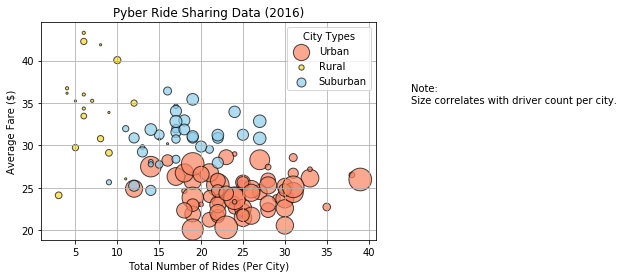

In [4]:
urbantrues = combined_data_df[(combined_data_df.type == 'Urban')]
urbanrides = urbantrues.groupby([combined_data_df.city]).count()['ride_id']
urbanfares = urbantrues.groupby([combined_data_df.city]).mean()['fare']

ruraltrues = combined_data_df[(combined_data_df.type == 'Rural')]
ruralrides = ruraltrues.groupby([combined_data_df.city]).count()['ride_id']
ruralfares = ruraltrues.groupby([combined_data_df.city]).mean()['fare']

srbantrues = combined_data_df[(combined_data_df.type == 'Suburban')]
srbanrides = srbantrues.groupby([combined_data_df.city]).count()['ride_id']
srbanfares = srbantrues.groupby([combined_data_df.city]).mean()['fare']


usize = (4*urbantrues['driver_count'])**1.1 
rsize = (4*ruraltrues['driver_count'])**1.1 
ssize = (4*srbantrues['driver_count'])**1.1 

plt.scatter(urbanrides, urbanfares, marker='o', facecolors='#F88461', 
            edgecolors='black', alpha=.7, s = usize, label = 'Urban')
plt.scatter(ruralrides, ruralfares, marker='o', facecolors='#FEDB28', 
            edgecolors='black', alpha=.7, s = rsize, label='Rural')
plt.scatter(srbanrides, srbanfares, marker='o', facecolors='#8FCEEB', 
            edgecolors='black', alpha=.7, s = ssize, label = 'Suburban')

note = ('Note:\n Circle size correlates with driver count per city')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.annotate('Note:\nSize correlates with driver count per city.', xy=(40, 35), xytext=(45,35))
plt.legend(title='City Types')
plt.grid()


plt.savefig("../Pyber/Output/PyberRidesandAverages.png") 
plt.show()

## Total Fares by City Type

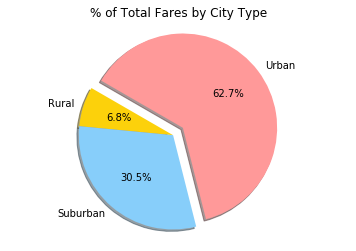

In [5]:
labels = ['Rural', 'Suburban', 'Urban']
colors = ['#FCD10B', '#87CEFA', '#FF9999']

# Calculate Type Percents
totalfarebycitytype = combined_data_df.groupby('type')['fare'].sum()

# Build Pie Chart
plt.pie(totalfarebycitytype, 
        explode=[0,0,0.13], 
        labels = labels, 
        colors=colors, 
        shadow=True,
        autopct='%.1f%%',
        startangle=150, 
          )
plt.title("% of Total Fares by City Type")
plt.axis('equal')

# Save Figure
plt.savefig("../Pyber/Output/PyberPercTotalFaresbyCityType.png") 

plt.show()

## Total Rides by City Type

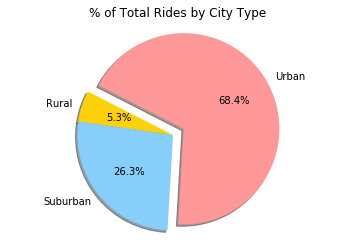

In [6]:
# Calculate Ride Percents
totalridesbycitytype = combined_data_df.groupby('type')['ride_id'].count()

# Build Pie Chart

plt.pie(totalridesbycitytype, 
        explode=[0,0,0.13], 
        labels = labels, 
        colors=colors, 
        shadow=True,
        autopct='%.1f%%',
        startangle = 153,
        #alpha=alpha
       )
plt.title("% of Total Rides by City Type")
plt.axis('equal')
# Save Figure
plt.savefig("../Pyber/Output/PyberTotalRidesbyCityType.png") 
plt.show()

## Total Drivers by City Type

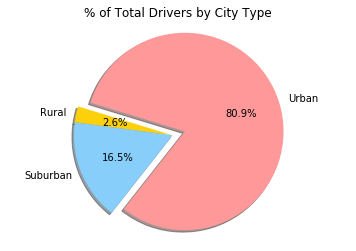

In [7]:
# Calculate Driver Percents
#totaldriversbycitytype = combined_data_df.groupby(['type', 'city', 'type']).sum()

totaldriversbycitytype = city_data_df.groupby('type').sum()['driver_count']
#totaldriversbycitytype['driver_count']/

# Build Pie Chart

plt.pie(totaldriversbycitytype, 
        explode=[0,0,0.13], 
        labels=labels, 
        colors=colors, 
        shadow=True,
        autopct='%.1f%%',
        startangle = 163,
       )
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Pyber/Output/PyberTotalDriversbyCityType.png") 
plt.axis('equal')
plt.show()